# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import gc
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
from contextlib import contextmanager
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from numpy import mean
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_validate
from lightgbm import LGBMClassifier
from collections import Counter

In [2]:
# chargement du fichier pickle
df = pd.read_pickle(r"C:\Users\vassalr\OneDrive - STMicroelectronics\Documents\Robin\DataScience\Dataset\Projet7\home-credit-default-risk\dataset_pickled.pkl")
selected_feature_list=['PREV_CODE_REJECT_REASON_HC_MEAN', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'REFUSED_APP_CREDIT_PERC_MIN', 'REFUSED_AMT_CREDIT_MAX', 'PREV_PRODUCT_COMBINATION_POS mobile with interest_MEAN', 'PREV_NAME_YIELD_GROUP_low_normal_MEAN', 'PREV_NAME_YIELD_GROUP_low_action_MEAN', 'PREV_NAME_YIELD_GROUP_high_MEAN', 'PREV_NAME_YIELD_GROUP_XNA_MEAN', 'PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN', 'PREV_NAME_PRODUCT_TYPE_walk-in_MEAN', 'PREV_NAME_PAYMENT_TYPE_XNA_MEAN', 'PREV_NAME_CONTRACT_TYPE_Revolving loans_MEAN', 'PREV_NAME_CONTRACT_STATUS_Refused_MEAN', 'PREV_NAME_CONTRACT_STATUS_Approved_MEAN', 'PREV_DAYS_DECISION_MIN', 'PREV_CODE_REJECT_REASON_XAP_MEAN', 'PREV_CODE_REJECT_REASON_SCOFR_MEAN', 'PREV_CNT_PAYMENT_SUM', 'INSTAL_DAYS_ENTRY_PAYMENT_SUM', 'DAYS_EMPLOYED_PERC', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'CODE_GENDER', 'CC_CNT_DRAWINGS_CURRENT_MEAN', 'CC_CNT_DRAWINGS_ATM_CURRENT_MEAN', 'BURO_DAYS_CREDIT_MIN', 'BURO_DAYS_CREDIT_MEAN', 'BURO_CREDIT_ACTIVE_Closed_MEAN', 'BURO_CREDIT_ACTIVE_Active_MEAN', 'APPROVED_DAYS_DECISION_MIN', 'APPROVED_APP_CREDIT_PERC_MAX', 'APPROVED_AMT_ANNUITY_MAX', 'AMT_GOODS_PRICE', 'ACTIVE_DAYS_CREDIT_MAX', 'WALLSMATERIAL_MODE_Panel', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REGION_POPULATION_RELATIVE', 'REFUSED_CNT_PAYMENT_SUM', 'REFUSED_CNT_PAYMENT_MEAN', 'PREV_PRODUCT_COMBINATION_POS industry with interest_MEAN', 'PREV_PRODUCT_COMBINATION_POS household without interest_MEAN', 'PREV_PRODUCT_COMBINATION_Cash X-Sell: low_MEAN', 'PREV_PRODUCT_COMBINATION_Card Street_MEAN', 'PREV_NAME_PORTFOLIO_Cards_MEAN', 'PREV_NAME_PAYMENT_TYPE_Cash through the bank_MEAN', 'PREV_NAME_GOODS_CATEGORY_Mobile_MEAN', 'PREV_HOUR_APPR_PROCESS_START_MIN', 'PREV_HOUR_APPR_PROCESS_START_MEAN', 'PREV_HOUR_APPR_PROCESS_START_MAX', 'PREV_CNT_PAYMENT_MEAN', 'PREV_CHANNEL_TYPE_Stone_MEAN', 'PREV_AMT_DOWN_PAYMENT_MIN', 'PREV_AMT_ANNUITY_MEAN', 'POS_MONTHS_BALANCE_SIZE', 'POS_COUNT', 'OCCUPATION_TYPE_Laborers', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_EDUCATION_TYPE_Higher education', 'LIVINGAREA_AVG', 'INSTAL_PAYMENT_DIFF_SUM', 'INSTAL_PAYMENT_DIFF_MEAN', 'INSTAL_PAYMENT_DIFF_MAX', 'INSTAL_DBD_SUM', 'INSTAL_DBD_MEAN', 'INSTAL_DBD_MAX', 'INSTAL_DAYS_ENTRY_PAYMENT_MAX', 'INSTAL_AMT_PAYMENT_MIN', 'INCOME_PER_PERSON', 'INCOME_CREDIT_PERC', 'HOUSETYPE_MODE_block of flats', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'FLAG_DOCUMENT_3', 'EMERGENCYSTATE_MODE_No', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'CLOSED_MONTHS_BALANCE_SIZE_SUM', 'CLOSED_DAYS_CREDIT_ENDDATE_MAX', 'CLOSED_AMT_CREDIT_SUM_SUM', 'CC_MONTHS_BALANCE_MEAN', 'CC_CNT_DRAWINGS_CURRENT_MAX', 'CC_CNT_DRAWINGS_ATM_CURRENT_VAR', 'CC_CNT_DRAWINGS_ATM_CURRENT_MAX', 'CC_AMT_RECIVABLE_MEAN', 'CC_AMT_DRAWINGS_ATM_CURRENT_SUM', 'CC_AMT_DRAWINGS_ATM_CURRENT_MEAN', 'CC_AMT_CREDIT_LIMIT_ACTUAL_MEAN', 'CC_AMT_BALANCE_MEAN', 'BURO_MONTHS_BALANCE_SIZE_SUM', 'BURO_MONTHS_BALANCE_SIZE_MEAN', 'BURO_MONTHS_BALANCE_MIN_MIN', 'BURO_DAYS_CREDIT_UPDATE_MEAN', 'BURO_DAYS_CREDIT_MAX', 'BURO_DAYS_CREDIT_ENDDATE_MIN', 'BURO_CREDIT_TYPE_Car loan_MEAN', 'APPROVED_HOUR_APPR_PROCESS_START_MEAN', 'APPROVED_HOUR_APPR_PROCESS_START_MAX', 'APPROVED_CNT_PAYMENT_MEAN', 'APPROVED_APP_CREDIT_PERC_MEAN', 'APPROVED_AMT_DOWN_PAYMENT_MIN', 'APPROVED_AMT_DOWN_PAYMENT_MEAN', 'APPROVED_AMT_DOWN_PAYMENT_MAX', 'APPROVED_AMT_CREDIT_MAX', 'APPROVED_AMT_ANNUITY_MEAN', 'ANNUITY_INCOME_PERC', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'ACTIVE_MONTHS_BALANCE_SIZE_MEAN', 'ACTIVE_DAYS_CREDIT_MEAN', 'ACTIVE_DAYS_CREDIT_ENDDATE_MAX', 'ACTIVE_AMT_CREDIT_SUM_SUM', 'ACTIVE_AMT_CREDIT_SUM_LIMIT_SUM', 'ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN', 'ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN']

In [3]:
lite_df = df[selected_feature_list]
lite_df.shape

(307507, 122)

In [4]:
# on rajoute target
lite_df["TARGET"] = df["TARGET"]

# Simple imputer median

In [5]:
lite_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# # median imputation 
lite_df[:] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(lite_df[:])

# X = lite_df.iloc[:, :-1]
# y = lite_df["TARGET"]
# print(lite_df.shape)
# print(X.shape)
# print(y.shape)

In [6]:
X_imputed = lite_df.iloc[:, :-1]
y_imputed = lite_df["TARGET"]
counter = Counter(y_imputed)
print(counter)

Counter({0.0: 282682, 1.0: 24825})


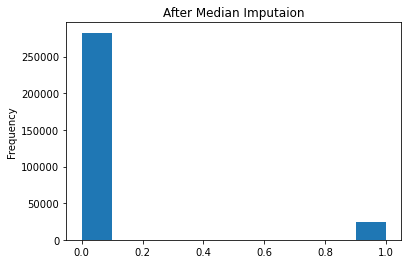

In [7]:
y_imputed.plot.hist(title="After Median Imputaion");

# SPLIT

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, train_size=0.75, random_state=42)
print("TRAIN : ")
print(X_train.shape)
print(y_train.shape)
print("TEST : ")
print(X_test.shape)
print(y_test.shape)

TRAIN : 
(230630, 122)
(230630,)
TEST : 
(76877, 122)
(76877,)


In [9]:
# saving X_test as csv
root = r"C:\Users\vassalr\OneDrive - STMicroelectronics\Documents\Robin\DataScience\Projets\7_ImplémentezUnModèleDeScoring"
name = "X_test.csv"
X_test.to_csv(path_or_buf=os.path.join(root, name))

# Balance data

Counter({0.0: 212061, 1.0: 18569})


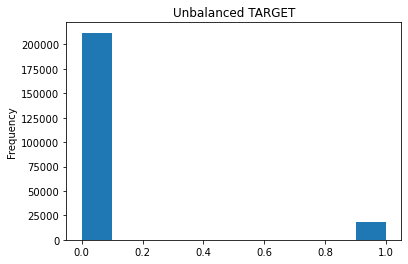

In [10]:
counter = Counter(y_train)
print(counter)
y_train.plot.hist(title="Unbalanced TARGET");

## SMOTE (only oversampling)

0.9.0
(424122, 122)
(424122,)
Counter({0.0: 212061, 1.0: 18569})


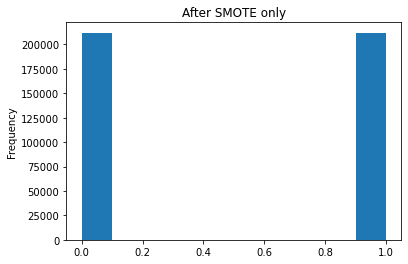

In [48]:
# check version number
import imblearn
print(imblearn.__version__)

from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X_smote_only, y_smote_only = oversample.fit_resample(X_train, y_train)
print(X_smote_only.shape)
print(y_smote_only.shape)

counter = Counter(y_train)
print(counter)

y_smote_only.plot.hist(title="After SMOTE only");

## RandomUnderSampler + SMOTE 

Counter({0.0: 103161, 1.0: 98002})


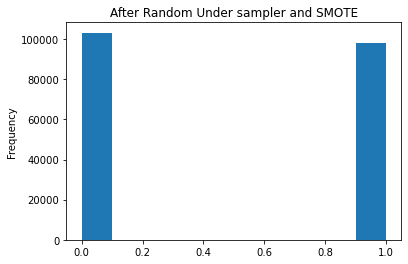

In [49]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

under = RandomUnderSampler(sampling_strategy=0.18)
over = SMOTE(sampling_strategy=0.95)

steps = [('u', under), ('o', over)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_over_under, y_over_under = pipeline.fit_resample(X_train, y_train)

y_over_under.plot.hist(title="After Random Under sampler and SMOTE");
counter = Counter(y_over_under)
print(counter)

## Bordeline SMOTE

In [11]:
# to test

## TomekLinks + RandomUnderSampler + Smote

In [66]:
# 11 min ! 
from imblearn.under_sampling import TomekLinks

counter = Counter(y_train)
print(counter)

tl = TomekLinks(n_jobs=-2)
X_tomek, y_tomek = tl.fit_resample(X_train, y_train)

counter = Counter(y_tomek)
print(counter)

Counter({0.0: 212061, 1.0: 18569})
Counter({0.0: 205433, 1.0: 18569})


Counter({0.0: 103161, 1.0: 98002})


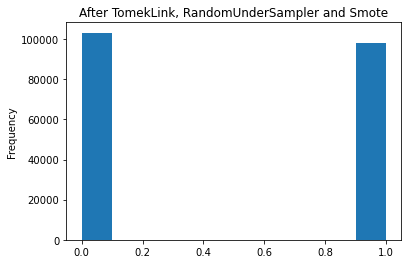

In [67]:
# it corresponds to the desired ratio of the number of samples in the minority class over the number of
# samples in the majority class after resampling
# il correspond au rapport souhaité du nombre d'échantillons dans la classe minoritaire sur le nombre
# d'échantillons dans la classe majoritaire après rééchantillonnage

under = RandomUnderSampler(sampling_strategy=0.18)
over = SMOTE(sampling_strategy=0.95)

steps = [('u', under), ('o', over)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_balanced, y_balanced = pipeline.fit_resample(X_tomek, y_tomek)

y_balanced.plot.hist(title="After TomekLink, RandomUnderSampler and Smote");
counter = Counter(y_balanced)
print(counter)

## Save it to avoid resampling

In [68]:
# saving balanced data train
root = r"C:\Users\vassalr\OneDrive - STMicroelectronics\Documents\Robin\DataScience\Projets\7_ImplémentezUnModèleDeScoring\afterBalancingData"
name = "X_balanced.pickle"
X_balanced.to_pickle(os.path.join(root, name))
name = "y_balanced.pickle"
y_balanced.to_pickle(os.path.join(root, name))
# savingt test set
name = "X_test.pickle"
X_test.to_pickle(os.path.join(root, name))
name = "y_test.pickle"
y_test.to_pickle(os.path.join(root, name))

# Dimension reduction

In [12]:
# from sklearn import manifold, decomposition
# from sklearn import cluster, metrics

# tsne = manifold.TSNE(n_components=2, init='random', random_state=42)
# X_tsne = tsne.fit_transform(X_balanced)
# print(X_balanced.shape)
# print(type(X_balanced))
# tsne1 = X_tsne[:, 0]
# tsne2 = X_tsne[:, 1]

# plt.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], c=y_balanced)
# plt.show()


# plt.figure(figsize=(10, 6))
# sns.scatterplot(x="tsne1", y="tsne2", hue="main_categories_encoded", data=df, legend="brief", 
#                 palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)
# plt.title('TSNE selon les vraies classes', fontsize=30, pad=35, fontweight='bold')
# plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
# plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
# plt.legend(prop={'size': 14}) 
# plt.show()

# Modelisation

## Sampling

In [13]:
# X_train_sample = X_balanced.sample(frac=0.010, replace=False, random_state = 5)
# y_train_sample = y_balanced.sample(frac=0.010, replace=False, random_state = 5)

In [14]:
# X_train_sample.shape

In [15]:
# y_train_sample.shape

In [16]:
# X_train_sample.shape[0]

In [17]:
# X_train = X_train.sample(frac=0.010, replace=False, random_state = 5)
# y_train = y_train.sample(frac=0.010, replace=False, random_state = 5)

In [18]:
# print(X_train.shape)
# print(y_train.shape)

In [19]:
# TO DO
# check index correspondance

## Make scorer

In [20]:
# from sklearn.linear_model import LogisticRegression

# # define pipeline
# model = LogisticRegression()
# over = SMOTE(sampling_strategy="minority")
# under = RandomUnderSampler(sampling_strategy="majority")

# steps = [('o', over), ('u', under), ('model', model)]
# pipeline = Pipeline(steps=steps)

In [21]:
# from sklearn.ensemble import RandomForestClassifier

# # define pipeline
# model = RandomForestClassifier() # to tune
# over = SMOTE(sampling_strategy="minority")
# under = RandomUnderSampler(sampling_strategy="majority")

# steps = [('o', over), ('u', under), ('model', model)]
# pipeline = Pipeline(steps=steps)

In [22]:
# from xgboost import XGBClassifier

# # define pipeline
# model = XGBClassifier() # to tune
# over = SMOTE(sampling_strategy="minority")
# under = RandomUnderSampler(sampling_strategy="majority")

# steps = [('o', over), ('u', under), ('model', model)]
# pipeline = Pipeline(steps=steps)

In [23]:
# from lightgbm import LGBMClassifier
# # define pipeline
# # model = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
# #             reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40) # to check
# seed = 42
# model = LGBMClassifier(random_state=seed)
# over = SMOTE(sampling_strategy="minority")
# under = RandomUnderSampler(sampling_strategy="majority")
# steps = [('o', over), ('u', under), ('model', model)]
# pipeline = Pipeline(steps=steps)

In [24]:
# pour aller plus vite que grid search
# sklearn.model_selection.RandomizedSearchCV

In [25]:
# model.get_params().keys()